## Flipkart Product detection Using YOLOv5

## Step 1: Environment Setup

In [1]:
# Clonning the YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 17018, done.
remote: Counting objects: 100% (213/213), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 17018 (delta 120), reused 126 (delta 71), pack-reused 16805 (from 1)
Receiving objects: 100% (17018/17018), 15.73 MiB | 32.88 MiB/s, done.
Resolving deltas: 100% (11649/11649), done.
/kaggle/working/yolov5


In [2]:
#  Installing the necessary requirements:
!pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 876.6/876.6 kB 22.1 MB/s eta 0:00:0000:01


## Step 2: Preparing Dataset Configuration


In [5]:
# Defining the dataset configuration in a YAML file:
yaml_content = """
train: /Flipkart Box Dataset/images/train
val: /Flipkart Box Dataset/images/valid
test: /Flipkart Box Dataset/images/test

nc: 3
names: ['flyer', 'mediumBox', 'smallBox']
"""

# Specify the path for dataset.yaml
yaml_path = '/output-directory/data.yaml'

# Write the YAML content to the file
with open(yaml_path, 'w') as file:
    file.write(yaml_content)

print(f"dataset.yaml has been saved to: {yaml_path}")

dataset.yaml has been saved to: /kaggle/working/data.yaml


## Step 3: Training the Model

In [7]:
# Going to yolov5 directory
%cd /output-directory/

/kaggle/working


In [8]:
# Training the model
!python yolov5/train.py --img 640 --batch 8 --epochs 200 --data data.yaml --weights yolov5s.pt --cache

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: weights=yolov5s.pt, cfg=, data=data.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evo

## Step 4: Reviewing Training Results

In [11]:
# Imporing necessary libraries
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt

In [12]:
# Locating the latest training directory and reviewing the results:

# Finding the most recent training directory
list_of_files = glob.glob('/output-directory/yolov5/runs/train/exp') 
latest_dir = max(list_of_files, key=os.path.getctime)

# Loading the results.csv file from the latest directory
results_path = os.path.join(latest_dir, 'results.csv')
if os.path.exists(results_path):
    data = pd.read_csv(results_path)
    # Printing the last row of metrics, which represents the final epoch's performance
    print(data.iloc[-1])
else:
    print("Results file not found. Make sure training has completed successfully.")

               epoch    199.000000
      train/box_loss      0.025931
      train/obj_loss      0.015616
      train/cls_loss      0.006173
   metrics/precision      0.893040
      metrics/recall      0.778760
     metrics/mAP_0.5      0.832150
metrics/mAP_0.5:0.95      0.523020
        val/box_loss      0.034452
        val/obj_loss      0.009477
        val/cls_loss      0.017514
               x/lr0      0.000199
               x/lr1      0.000199
               x/lr2      0.000199
Name: 199, dtype: float64


In [13]:
# Path to the results.csv file
results_path = '/output-directory/yolov5/runs/train/exp/results.csv'

# Loading the CSV data into a DataFrame
results = pd.read_csv(results_path)

In [14]:
# Printing results
results

,epoch,train/box_loss,train/obj_loss,train/cls_loss,metrics/precision,metrics/recall,metrics/mAP_0.5,metrics/mAP_0.5:0.95,val/box_loss,val/obj_loss,val/cls_loss,x/lr0,x/lr1,x/lr2
0,0,0.107100,0.033554,0.038694,0.002930,0.426750,0.026072,0.007353,0.097072,0.023654,0.040089,0.084700,0.001700,0.001700
1,1,0.097651,0.038469,0.039934,0.004077,0.572450,0.041255,0.011267,0.085922,0.020091,0.039886,0.068483,0.003483,0.003483
2,2,0.082050,0.035401,0.035922,0.422360,0.074074,0.055940,0.023309,0.078701,0.018828,0.041147,0.052248,0.005248,0.005248
3,3,0.078562,0.039410,0.035438,0.530460,0.203230,0.157670,0.070951,0.072290,0.019204,0.041321,0.035995,0.006995,0.006995
4,4,0.071457,0.033472,0.033433,0.493220,0.262110,0.154860,0.063758,0.071959,0.017827,0.041116,0.019724,0.008724,0.008724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,0.023727,0.013616,0.004019,0.888070,0.791170,0.835710,0.527170,0.034555,0.009583,0.017450,0.000397,0.000397,0.000397
196,196,0.024195,0.014619,0.009649,0.890700,0.791170,0.836580,0.533720,0.034347,0.009522,0.017357,0.000347,0.000347,0.000347
197,197,0.023025,0.014861,0.003981,0.892730,0.788470,0.836060,0.534420,0.034294,0.009473,0.017553,0.000298,0.000298,0.000298
198,198,0.022067,0.014449,0.004469,0.891310,0.791170,0.835420,0.522020,0.034405,0.009501,0.017639,0.000249,0.000249,0.000249


In [15]:
# Printing columns of the results.csv file
print(results.columns)

Index(['               epoch', '      train/box_loss', '      train/obj_loss',
       '      train/cls_loss', '   metrics/precision', '      metrics/recall',
       '     metrics/mAP_0.5', 'metrics/mAP_0.5:0.95', '        val/box_loss',
       '        val/obj_loss', '        val/cls_loss', '               x/lr0',
       '               x/lr1', '               x/lr2'],
      dtype='object')


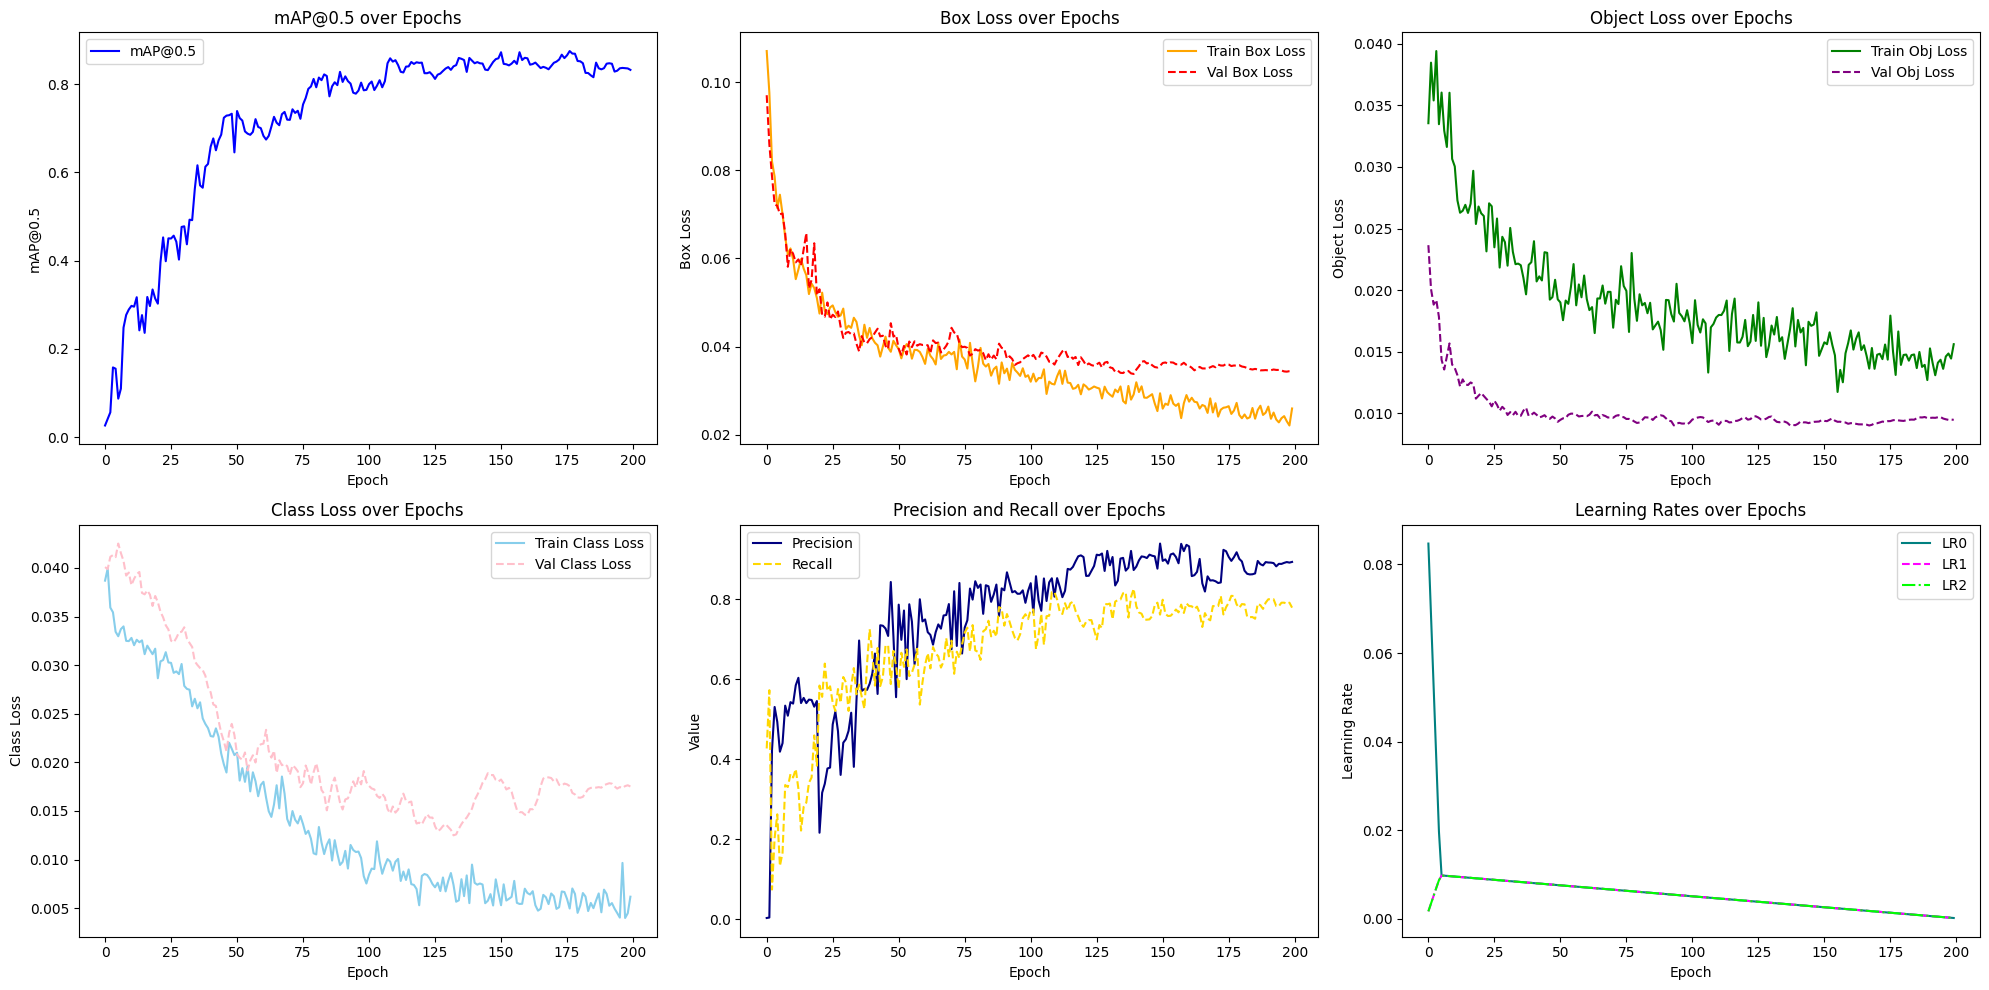

In [16]:
# Plotting results

results = pd.read_csv('/output-directory/yolov5/runs/train/exp/results.csv')

# Plotting
plt.figure(figsize=(20, 10))

# Subplot 1: mAP@0.5 over epochs
plt.subplot(2, 3, 1)
plt.plot(results['               epoch'], results['     metrics/mAP_0.5'], label='mAP@0.5', color='blue')
plt.xlabel('Epoch')
plt.ylabel('mAP@0.5')
plt.title('mAP@0.5 over Epochs')
plt.legend()

# Subplot 2: Training and Validation Box Loss
plt.subplot(2, 3, 2)
plt.plot(results['               epoch'], results['      train/box_loss'], label='Train Box Loss', color='orange')
plt.plot(results['               epoch'], results['        val/box_loss'], label='Val Box Loss', linestyle='--', color='red')
plt.xlabel('Epoch')
plt.ylabel('Box Loss')
plt.title('Box Loss over Epochs')
plt.legend()

# Subplot 3: Training and Validation Object Loss
plt.subplot(2, 3, 3)
plt.plot(results['               epoch'], results['      train/obj_loss'], label='Train Obj Loss', color='green')
plt.plot(results['               epoch'], results['        val/obj_loss'], label='Val Obj Loss', linestyle='--', color='purple')
plt.xlabel('Epoch')
plt.ylabel('Object Loss')
plt.title('Object Loss over Epochs')
plt.legend()

# Subplot 4: Training and Validation Class Loss
plt.subplot(2, 3, 4)
plt.plot(results['               epoch'], results['      train/cls_loss'], label='Train Class Loss', color='skyblue')
plt.plot(results['               epoch'], results['        val/cls_loss'], label='Val Class Loss', linestyle='--', color='pink')
plt.xlabel('Epoch')
plt.ylabel('Class Loss')
plt.title('Class Loss over Epochs')
plt.legend()

# Subplot 5: Precision and Recall
plt.subplot(2, 3, 5)
plt.plot(results['               epoch'], results['   metrics/precision'], label='Precision', color='navy')
plt.plot(results['               epoch'], results['      metrics/recall'], label='Recall', linestyle='--', color='gold')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Precision and Recall over Epochs')
plt.legend()

# Subplot 6: Learning Rates
plt.subplot(2, 3, 6)
plt.plot(results['               epoch'], results['               x/lr0'], label='LR0', color='teal')
plt.plot(results['               epoch'], results['               x/lr1'], label='LR1', linestyle='--', color='magenta')
plt.plot(results['               epoch'], results['               x/lr2'], label='LR2', linestyle='-.', color='lime')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Learning Rates over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

## Step 5: Performing Inference Tests

In [17]:
# Testing the trained model on new images:
!python yolov5/detect.py --weights /output-directory/yolov5/runs/train/exp/weights/best.pt --img 640 --conf 0.25 --source /test-box-image/test/

detect: weights=['/kaggle/working/yolov5/runs/train/exp/weights/best.pt'], source=/kaggle/input/test-box-image/test/, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-377-g24ee2801 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/20 /kaggle/input/test-box-image/test/box010_png_jpg.rf.99098c83a73da7251f9e3ad1fe132143.jpg: 640x640 1 smallBox, 6.7ms
image 2/20 /kaggle/input/test-box-image/test/box010_png_jpg.rf.fa7fefd15c32463baa274cc2f9ac2967.jpg: 640x640 1 mediumBox, 7.6ms
i

## Step 7: Displaying Inference Results

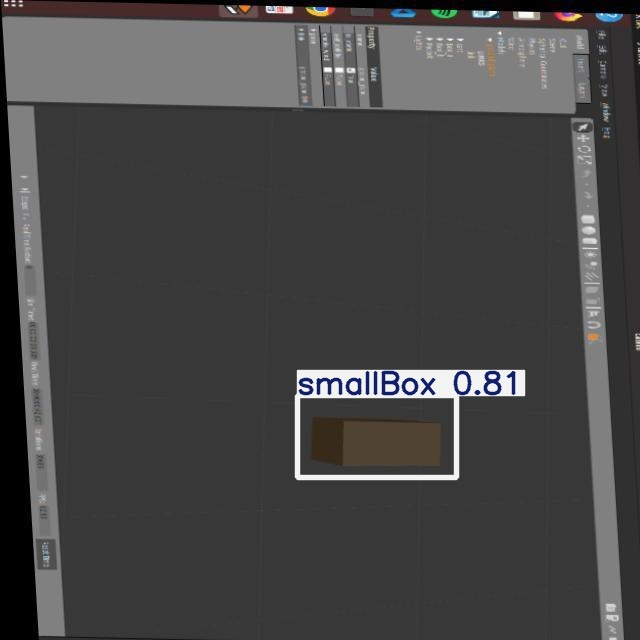

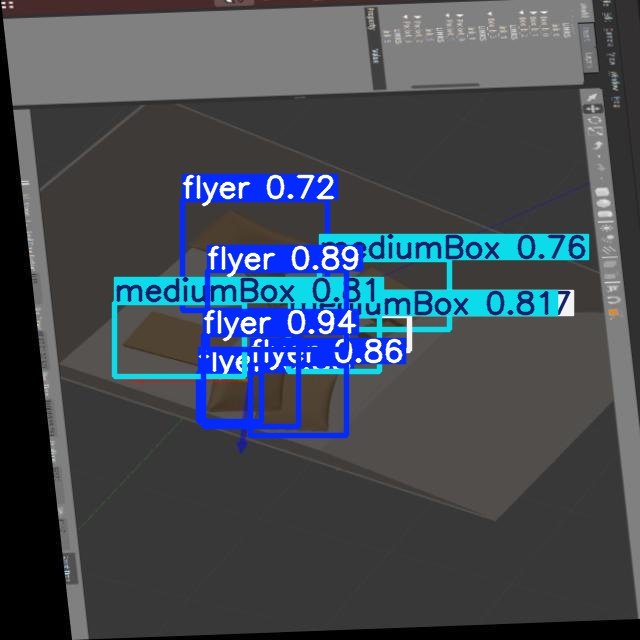

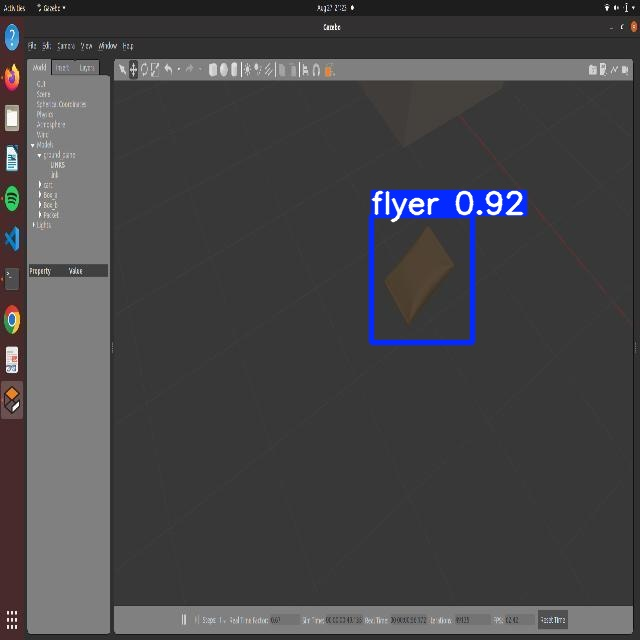

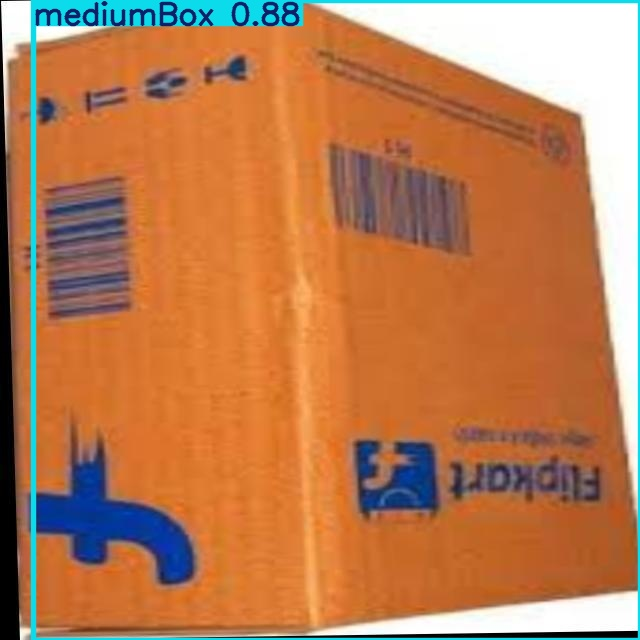

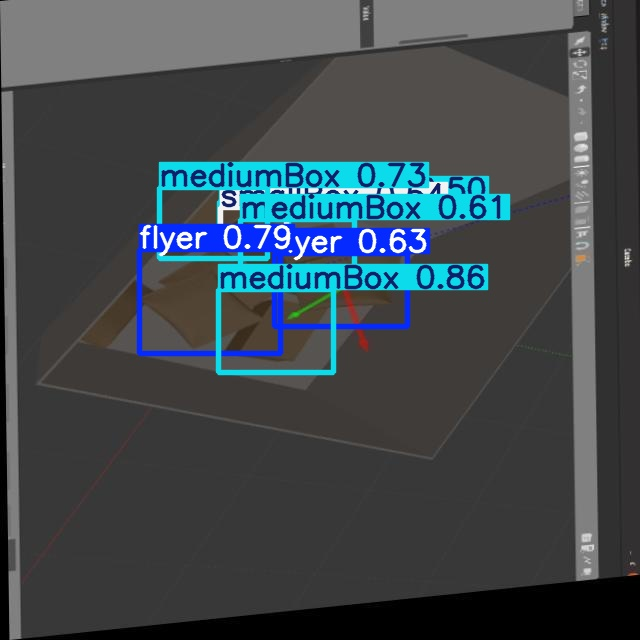

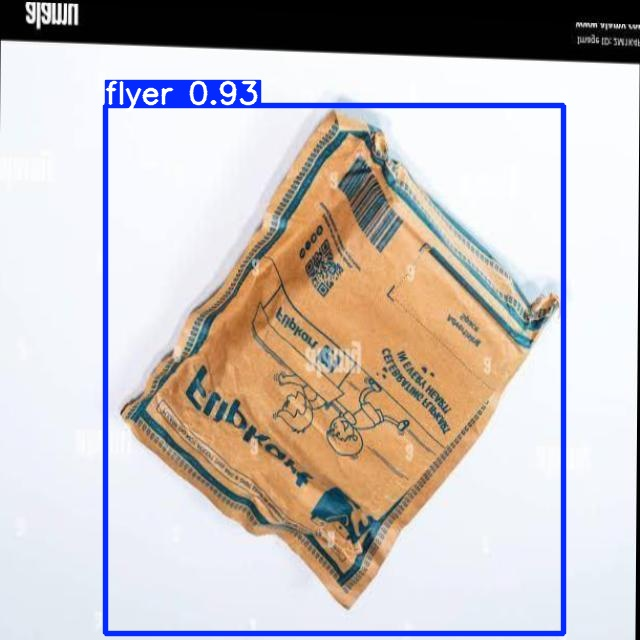

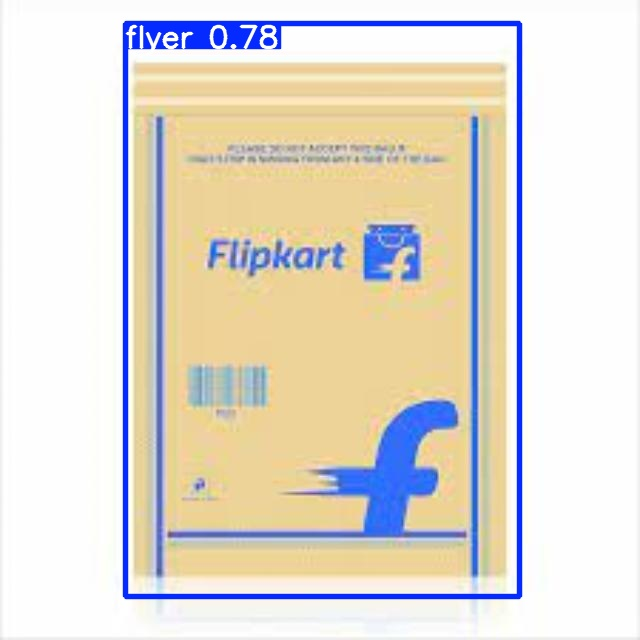

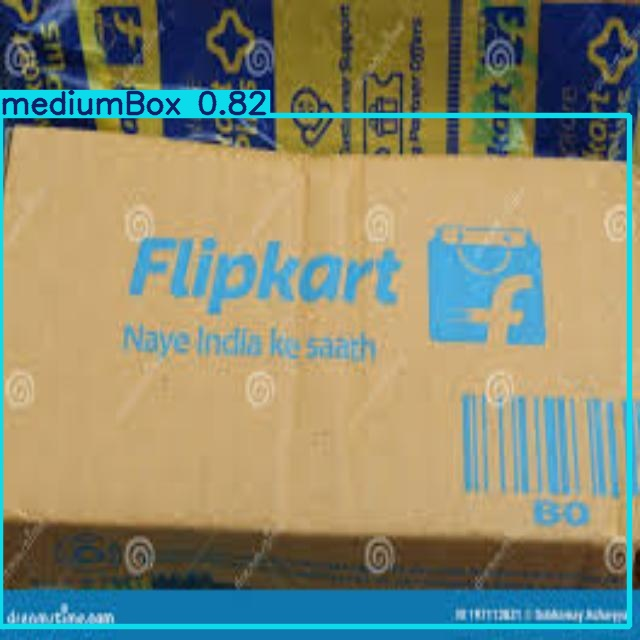

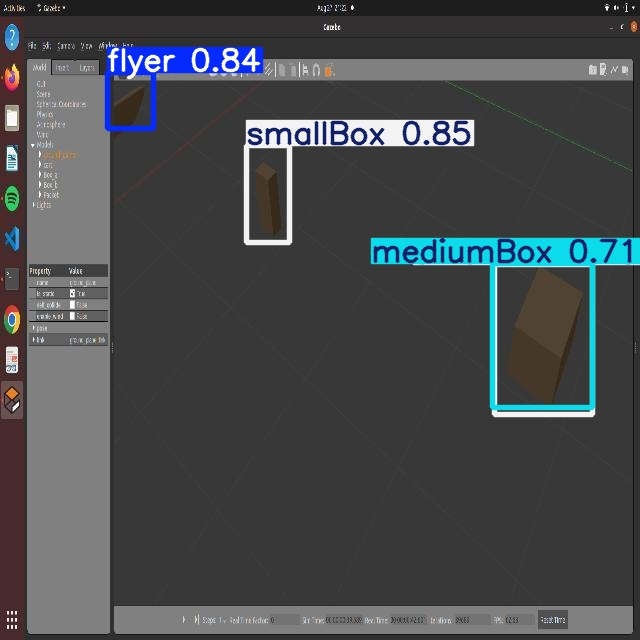

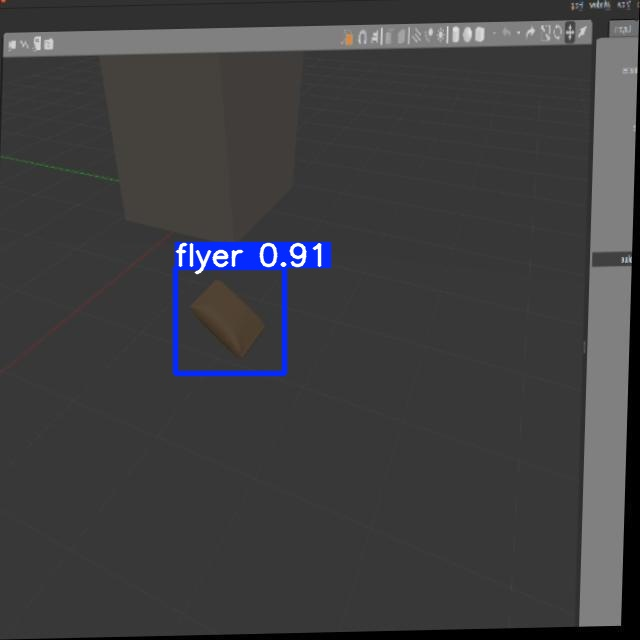

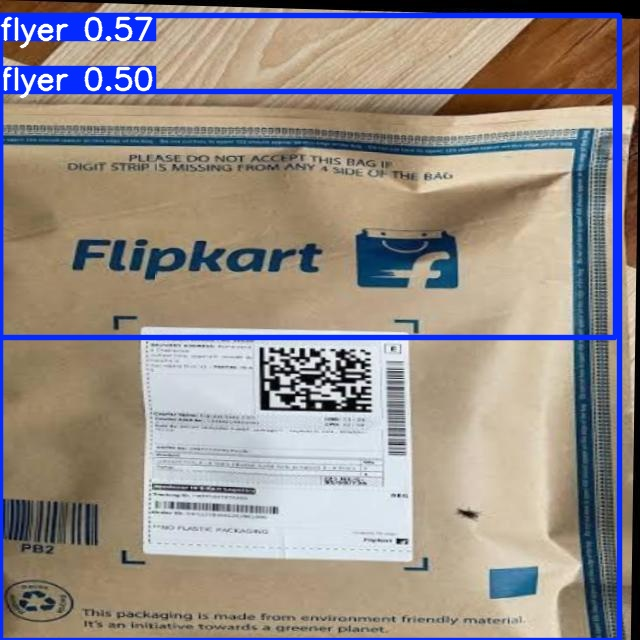

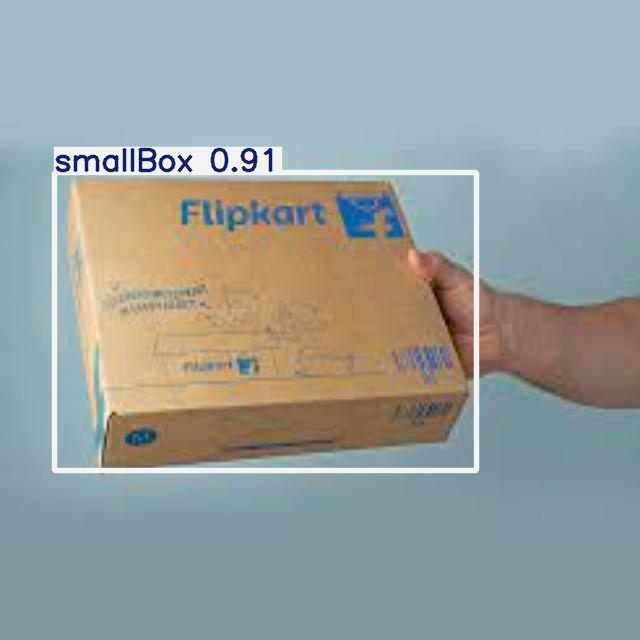

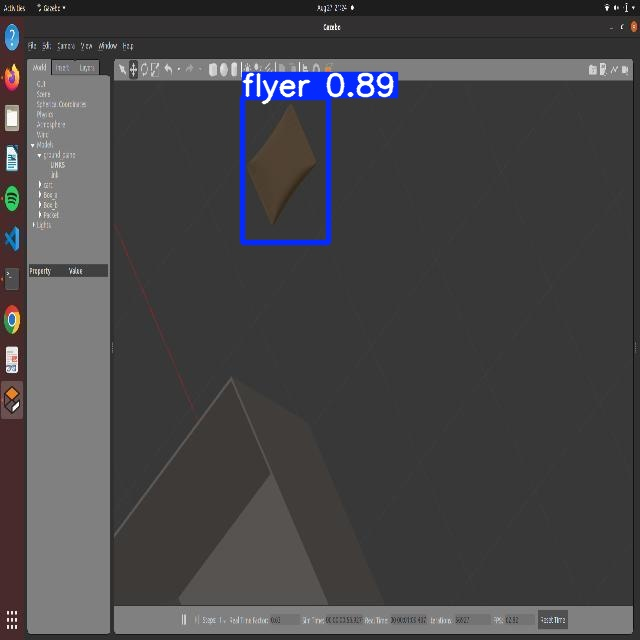

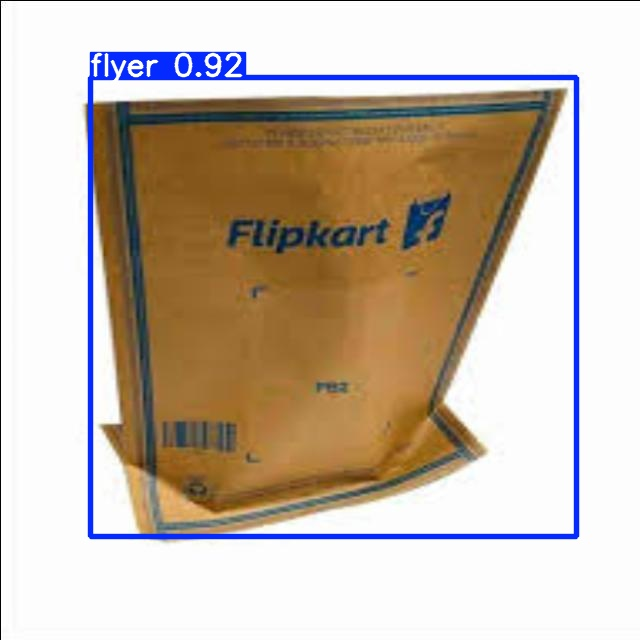

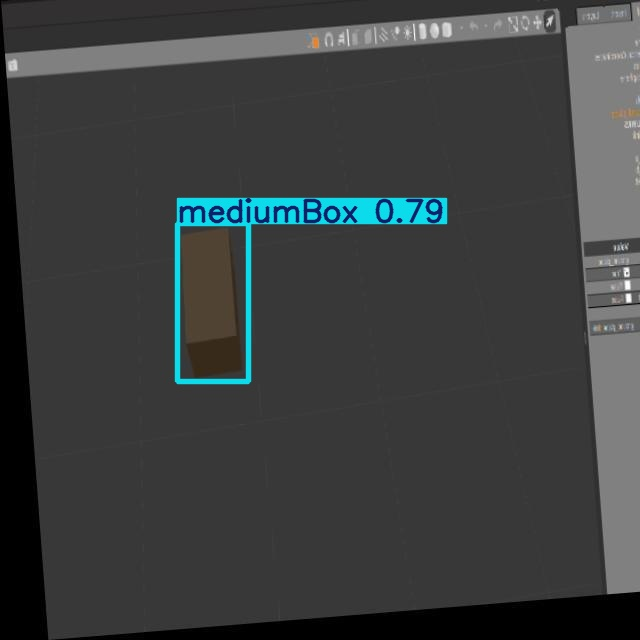

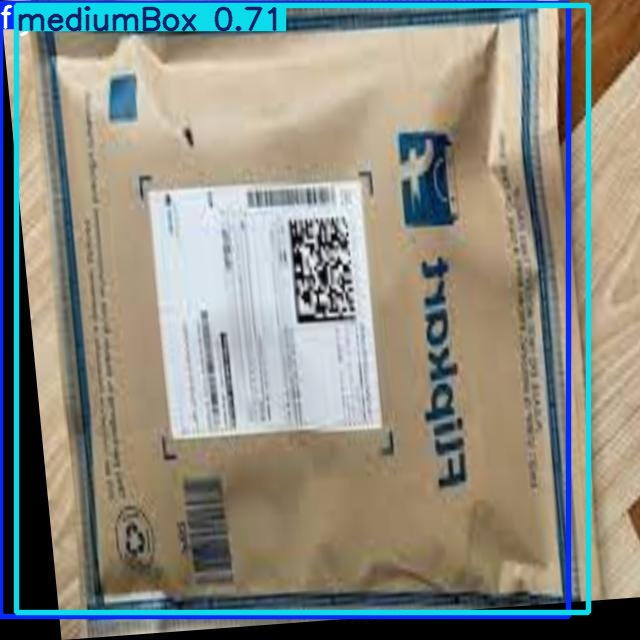

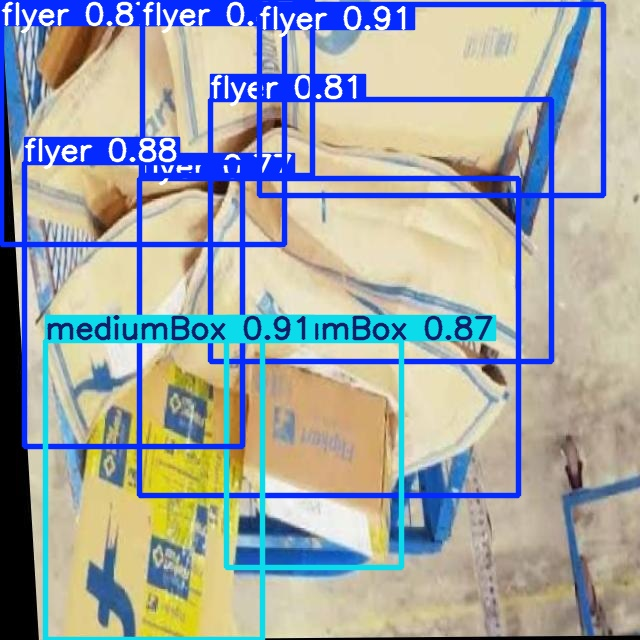

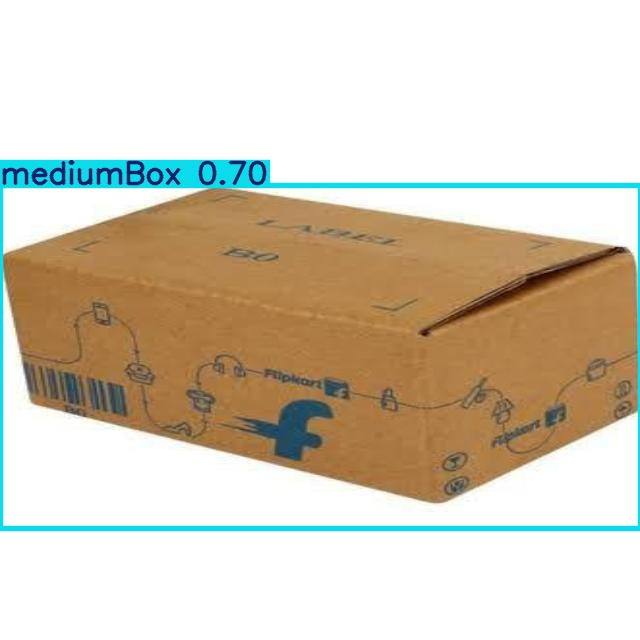

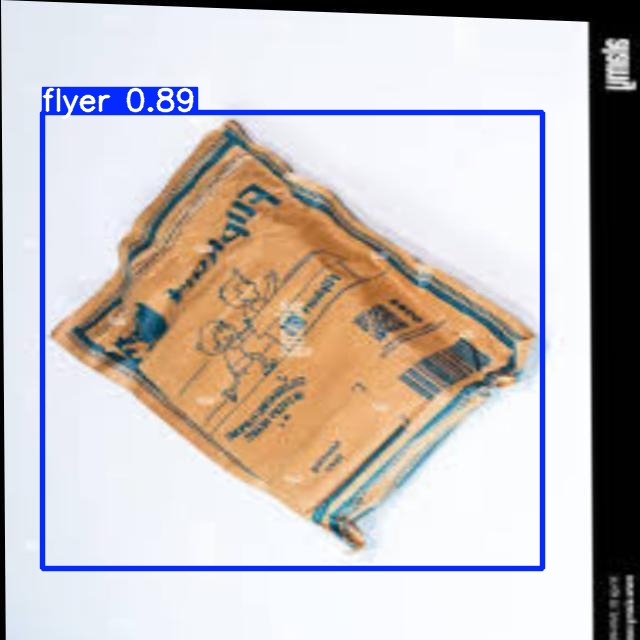

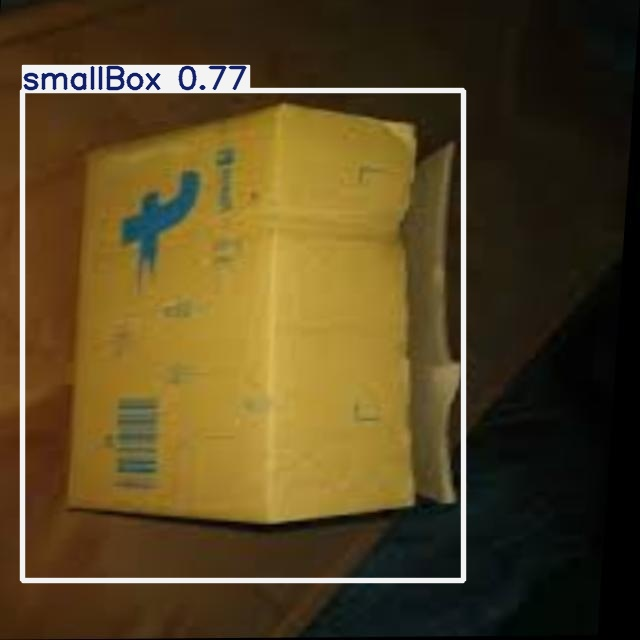

In [18]:
from IPython.display import Image, display

# The latest detection results are in "runs/detect/exp"
output_dir = '/output-directory/yolov5/runs/detect/exp'
output_images = os.listdir(output_dir)

# Loop through all detected images and display them
for image_name in output_images:
    if image_name.endswith('.jpg') or image_name.endswith('.png'):
        display(Image(filename=os.path.join(output_dir, image_name)))